IMPORTING NECESSARY LIBRARIES AND DEPENDANCIES

In [1]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 52.8 MB/s eta 0:00:00


In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
import tensorflow as tf
import sweetviz as sf
import seaborn as sns

SETTING GPU GROWTH LIMIT

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for i in gpus:
  tf.config.experimental.set_memory_growth(i,True)

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [41]:
data1=pd.read_csv('/content/gdrive/MyDrive/spotify dataset/data/data.csv')

In [40]:
data1.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [31]:
data1_og=pd.DataFrame(data1)
print(data1_og.columns)
data1_nodups=data1_og.drop_duplicates(inplace=True) #removing duplicate data so as to improve our analysis

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')


In [34]:
data1_og.shape

(170653, 19)

**THUS WE OBSERVE THAT THERE ARE 1.7M ROWS (NON DUPLICATE) AND 19 COLUMNS CONTAINING THE DIFFERENT ATTRIBUTES ABOUT EVERY SONG.**

In [20]:
song_show=sf.analyze(data1_og)

/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.10/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.10/dist-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to

In [29]:
song_show.show_html()

From the above Data Visualisation tool we observe that in recent years , the popularity for loud and energetic music has gone up while the popularity for acoustic and music with lower energy has gone down as well as people nowadays prefer loud music. This analysis can be helpful to suggest music at a later stage

In [47]:
data1_og.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


<Axes: >

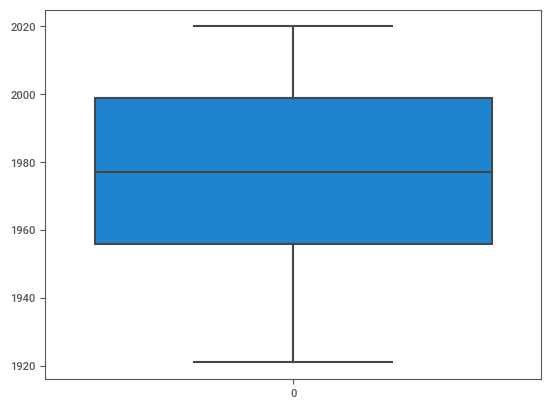

In [60]:
sns.boxplot(data1_og['year'])

As we can see from the above boxplot, the dataset is slightly skewed towards recent music(upper whisker shorter than lower)

<Axes: >

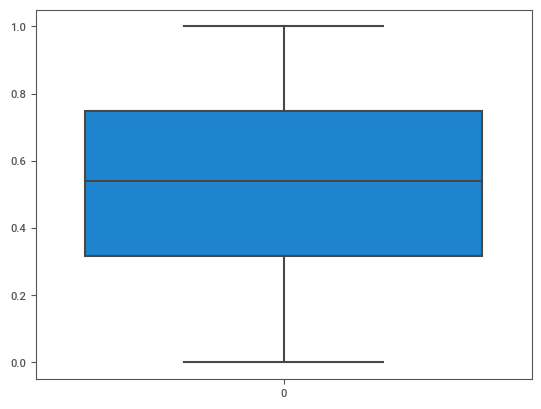

In [66]:
sns.boxplot(data1_og['valence']) #valence conveys the positivity or negativity in a piece of music

<Axes: >

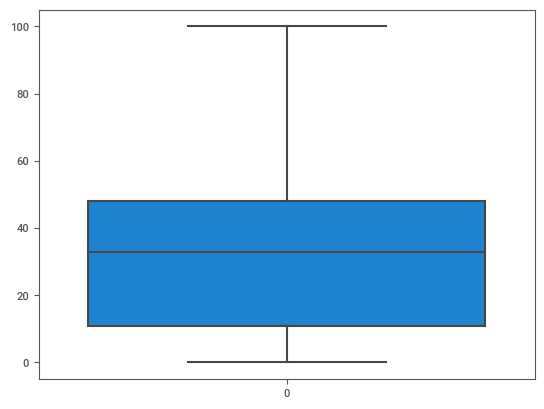

In [64]:
sns.boxplot(data1_og['popularity'])

In [74]:
print("Top 15 artists from the dataset:",data1_og['artists'].value_counts().head(15))

Top 15 artists from the dataset: ['Эрнест Хемингуэй']              1211
['Эрих Мария Ремарк']             1068
['Francisco Canaro']               942
['Frank Sinatra']                  630
['Ignacio Corsini']                628
['Elvis Presley']                  504
['Johnny Cash']                    484
['Bob Dylan']                      474
['The Rolling Stones']             471
['The Beach Boys']                 455
['Francisco Canaro', 'Charlo']     453
['Fleetwood Mac']                  437
['Dean Martin']                    420
['The Beatles']                    407
['Queen']                          406
Name: artists, dtype: int64


In [73]:
print(data1_og['artists'].nunique())

34088


<ipython-input-76-acdce1bc2c61>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=data1_og.corr() #correlation matrix


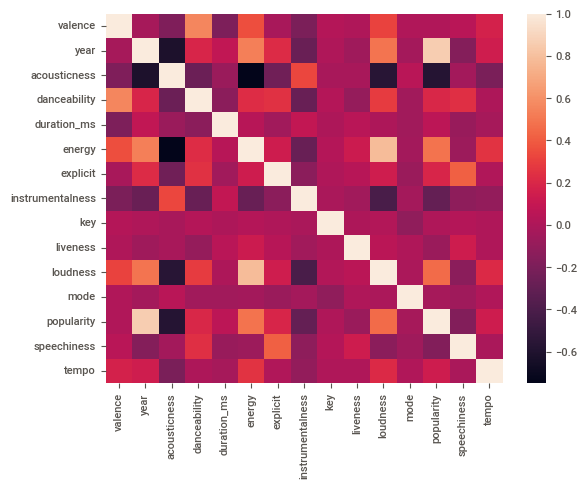

In [76]:
corrMatrix=data1_og.corr() #correlation matrix
sns.heatmap(corrMatrix)
plt.show()

Thus we observe that valence,energy and loudness have a large proportionality towards popularity.